In [ ]:
!pip install deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import random
import json
import numpy as np
import matplotlib.pyplot as plt
from deap import algorithms
from deap import creator
from deap import base
from deap import tools
import re

In [ ]:
url='https://raw.githubusercontent.com/it-ces/Datasets/refs/heads/main/Countries-location(google).csv'
data=pd.read_csv(url)
data.head()

,country,latitude,longitude,name
0,AD,42.546.245,1.601.554,Andorra
1,AE,23.424.076,53.847.818,United Arab Emirates
2,AF,3.393.911,67.709.953,Afghanistan
3,AG,17.060.816,-61.796.428,Antigua and Barbuda
4,AI,18.220.554,-63.068.615,Anguilla


In [ ]:
data.dropna(inplace=True)

def format_coordinate(coor):
  coor = re.sub(r"\.", "_" ,coor, count=1)
  coor = re.sub(r"\.", "", coor)
  coor = re.sub(r'_', '.', coor)
  return float(coor)

data['latitude'] = data['latitude'].apply(lambda x: format_coordinate(str(x)))
data['longitude'] = data['longitude'].apply(lambda x: format_coordinate(str(x)))

In [ ]:
n=200

In [ ]:
data = data.sample(n, random_state=42).reset_index(drop=True)
capitals = data['name'].unique()
cities_dict = {}
for index in data.index:
    cities_dict[data.loc[index,'name']] = [data.loc[index, 'latitude'] , data.loc[index, 'longitude']]

In [ ]:
cities_dict

{'Benin': [930.769, 2.315834],
 'Armenia': [40.069099, 45.038189],
 'Malawi': [-13.254308, 34.301525],
 'U.S. Virgin Islands': [18.335765, -64.896335],
 'Yemen': [15.552727, 48.516388],
 'Saint Pierre and Miquelon': [46.941936, -5.627111],
 'Turkmenistan': [38.969719, 59.556278],
 'Mauritius': [-20.348404, 57.552152],
 'Antarctica': [-75.250973, -71.389],
 'Kyrgyzstan': [4.120438, 74.766098],
 'China': [3.586166, 104.195397],
 'French Southern Territories': [-49.280366, 69.348557],
 'Uzbekistan': [41.377491, 64.585262],
 'French Polynesia': [-17.679742, -149.406843],
 'Guinea': [9.945587, -9.696645],
 'Netherlands': [52.132633, 5.291266],
 'Samoa': [-13.759029, -172.104629],
 'Azerbaijan': [40.143105, 47.576927],
 'Finland': [6.192411, 25.748151],
 'Sri Lanka': [7.873054, 80.771797],
 'Belarus': [53.709807, 27.953389],
 'Belgium': [50.503887, 4.469936],
 'Jersey': [49.214439, -213.125],
 'Bhutan': [27.514162, 90.433601],
 'Serbia': [44.016521, 21.005859],
 'Nauru': [-522.778, 166.93150

In [ ]:
%%time
def distanceF(cityA, cityB):
    return ((cityA[0] - cityB[0])**2  + (cityA[1] - cityB[1])**2)**(1/2)

# Evaluate a path
def eval_tsp(individual):
    index_test = individual
    path_test = capitals[index_test]
    route = distanceF(cities_dict[path_test[0]],  cities_dict[path_test[-1]]) # The first and the last city to complete
    for i in range(len(path_test)-1):
        route += distanceF(cities_dict[path_test[i]], cities_dict[path_test[i+1]])
    return route, # It is important return a tuple


IND_SIZE = len(capitals)  # the number of cities to find the closest path

# Creating problem and kind of individual:
creator.create("FitnessMin", base.Fitness, weights = (-1.0,))
creator.create("Individual", list , fitness=creator.FitnessMin)
## Toolbox
## create the tours or paths..
#the strategy is store the list in a list and create indices as individuals or tours.
toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(IND_SIZE), IND_SIZE)   # draw k samples without replacement including
                                                                        # zero  and excluding N
#Given that "indices" returns us a complete individual dont need uses init.Repeat otherwise, init.Iterate
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
# two paratermers accep initIterate ( container(Individual) and Func(indices a iterable function))
# Create the initial population
toolbox.register("population", tools.initRepeat, list, toolbox.individual,100)

#Genetic Operators (preserve the names)
toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=10)
toolbox.register("evaluate", eval_tsp)

# The genetic algorithm
# MuPlusLambda
# This algorithm is more elitist  and requiere more computations.
# the main idea is that here paretns ( mu) and child(lambda) compite between them
# The paremeters are initial population, toolbox, mu, lambda, cxpb ( probability of crossover)
# mutpb (probability of mutation), ngen (number of generations), stats ( registry of functions), halloffame


def main():
    random.seed(101)
    CXPB, MUTPB, NGEN = 0.7, 0.3, 10000
    pop = toolbox.population()
    MU, LAMBDA = len(pop), len(pop)
    hof = tools.HallOfFame(5)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    logbook = tools.Logbook()
    pop, logbook = algorithms.eaMuPlusLambda(pop,toolbox, MU, LAMBDA, CXPB, MUTPB, NGEN,
                                            stats = stats, halloffame=hof)
    return pop, logbook


best, log  = main()
print("\n",'--'*50)
print(f"The fitness {best[0].fitness.values} and he better path is : \n",)
print(capitals[best[0]])
print("--"*50)

Se han truncado las últimas 5000 líneas del flujo de salida.
5047	100   	11735.6	3.63798e-12	11735.6	11735.6
5048	100   	11735.6	3.63798e-12	11735.6	11735.6
5049	100   	11735.6	3.63798e-12	11735.6	11735.6
5050	100   	11735.6	3.63798e-12	11735.6	11735.6
5051	100   	11735.6	3.63798e-12	11735.6	11735.6
5052	100   	11735.6	3.63798e-12	11735.6	11735.6
5053	100   	11735.6	3.63798e-12	11735.6	11735.6
5054	100   	11735.6	3.63798e-12	11735.6	11735.6
5055	100   	11735.6	3.63798e-12	11735.6	11735.6
5056	100   	11735.6	3.63798e-12	11735.6	11735.6
5057	100   	11735.6	3.63798e-12	11735.6	11735.6
5058	100   	11735.6	3.63798e-12	11735.6	11735.6
5059	100   	11735.6	3.63798e-12	11735.6	11735.6
5060	100   	11735.6	3.63798e-12	11735.6	11735.6
5061	100   	11735.6	3.63798e-12	11735.6	11735.6
5062	100   	11735.6	3.63798e-12	11735.6	11735.6
5063	100   	11735.6	3.63798e-12	11735.6	11735.6
5064	100   	11735.6	3.63798e-12	11735.6	11735.6
5065	100   	11735.6	3.63798e-12	11735.6	11735.6
5066	100   	11735.6	3.63798

In [ ]:
best[0]

[68,
 42,
 7,
 151,
 102,
 182,
 98,
 81,
 26,
 55,
 8,
 31,
 191,
 157,
 158,
 131,
 64,
 160,
 139,
 5,
 21,
 130,
 118,
 72,
 27,
 53,
 89,
 175,
 70,
 169,
 88,
 50,
 83,
 154,
 135,
 71,
 110,
 46,
 177,
 127,
 119,
 19,
 145,
 60,
 30,
 96,
 148,
 45,
 184,
 84,
 29,
 39,
 183,
 14,
 193,
 91,
 87,
 63,
 37,
 128,
 24,
 103,
 171,
 120,
 85,
 137,
 164,
 17,
 82,
 40,
 6,
 195,
 73,
 16,
 129,
 13,
 90,
 36,
 80,
 161,
 79,
 57,
 1,
 74,
 199,
 196,
 180,
 149,
 44,
 77,
 69,
 125,
 61,
 94,
 141,
 67,
 49,
 162,
 93,
 142,
 165,
 56,
 35,
 62,
 54,
 197,
 117,
 187,
 194,
 109,
 140,
 153,
 3,
 133,
 172,
 15,
 124,
 168,
 92,
 152,
 32,
 58,
 116,
 156,
 11,
 122,
 181,
 51,
 189,
 34,
 134,
 12,
 33,
 20,
 95,
 111,
 159,
 100,
 173,
 115,
 112,
 185,
 146,
 192,
 99,
 22,
 59,
 0,
 48,
 166,
 18,
 76,
 132,
 107,
 97,
 143,
 28,
 178,
 43,
 38,
 52,
 108,
 167,
 47,
 2,
 138,
 23,
 123,
 174,
 101,
 78,
 163,
 179,
 170,
 86,
 150,
 104,
 105,
 66,
 126,
 114,
 9,
 10,
 75,
 

In [ ]:
def plot(log):
    gen = log.select("gen")
    fit_mins = log.select("min")
    fit_maxs = log.select("max")
    fit_avg = log.select("avg")
    fig, ax1 = plt.subplots()
    ax1.plot(gen, fit_mins, "-.")
    ax1.plot(gen, fit_maxs, "orange")
    ax1.plot(gen, fit_avg, "--g")
    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Fitness")
    ax1.legend(["Min", "Max", "Avg"], loc="upper right")
    plt.grid(False)
    plt.savefig('Convergencia.eps')

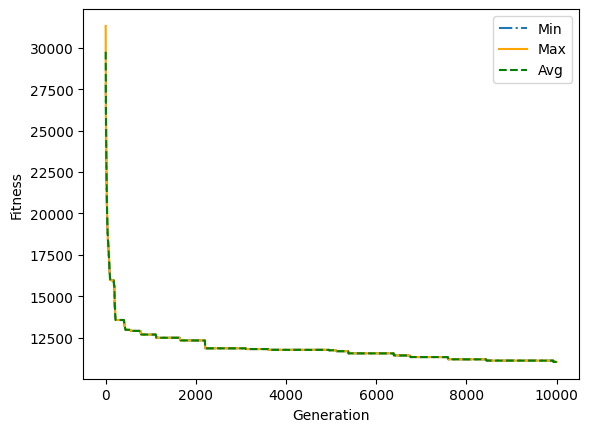

In [ ]:
plot(log)

In [ ]:
import folium
map = folium.Map(location=[4.570868, -74.297333], zoom_start=6)
points = [cities_dict[city] for city in list(capitals[best[0]]) + [capitals[best[0][0]]]]
folium.PolyLine(points).add_to(map)
map

In [ ]:
%%time
import math
import random
# Fitness function and another neccesary funtcions
def distanceF(cityA, cityB):
    return ((cityA[0] - cityB[0])**2  + (cityA[1] - cityB[1])**2)**(1/2)

# Evaluate a path
def eval_tsp(individual):
    index_test = individual
    path_test = capitals[index_test]
    route = distanceF(cities_dict[path_test[0]],  cities_dict[path_test[-1]]) # The first and the last city to complete
    for i in range(len(path_test)-1):
        route += distanceF(cities_dict[path_test[i]], cities_dict[path_test[i+1]])
    return route # It is important return a tuple # It was returning a tuple/list before, changed to single value (route)

random.seed(122)

def simula(path, max_iteraciones):
    T = eval_tsp(path) * 0.4  # Temperatura inicial
    v_enfriamiento = 123  # Número de iteraciones por temperatura
    for _ in range(max_iteraciones):
        dist_actual = eval_tsp(path)
        for _ in range(v_enfriamiento):
            i, j = random.sample(range(len(path)), 2)  # Escoge dos ciudades diferentes
            temp_path = path[:]
            temp_path[i], temp_path[j] = temp_path[j], temp_path[i]  # Intercambia
            dist = eval_tsp(temp_path)
            delta = dist_actual - dist
            if dist < dist_actual or random.random() < math.exp(delta / T):
                path = temp_path[:]  # Acepta la nueva solución
                break
        T -= 0.0001  # Disminuye la temperatura de forma lineal, opcional

    return path

# Inicializa solución
init_sol = list(range(len(capitals)))
random.shuffle(init_sol)
max_iteraciones = 100000  # Define el número máximo de iteraciones
solution = simula(init_sol, max_iteraciones)

print([capitals[i] for i in solution])  # Imprime las capitales en la solución
print(eval_tsp(solution))  # Imprime la distancia total de la solución


['Faroe Islands', 'Kuwait', 'Panama', 'Vietnam', 'Oman', 'San Marino', 'Thailand', 'Liberia', 'Ukraine', 'Guinea', 'Morocco', 'Yemen', 'Martinique', 'French Southern Territories', 'Latvia', 'Myanmar [Burma]', 'Mauritania', 'Cyprus', 'Slovakia', 'Christmas Island', 'Honduras', 'Spain', 'Heard Island and McDonald Islands', 'Switzerland', 'Malaysia', 'Venezuela', 'Angola', 'Sweden', 'Equatorial Guinea', 'Botswana', 'Uzbekistan', 'Paraguay', 'Falkland Islands [Islas Malvinas]', 'Ecuador', 'Montserrat', 'Cambodia', 'Georgia', 'Vanuatu', 'Tonga', 'Syria', 'Tokelau', 'Gabon', 'Costa Rica', 'Kazakhstan', 'Antarctica', 'Monaco', 'Nauru', 'Cape Verde', 'Eritrea', 'Laos', 'Singapore', 'Andorra', 'Luxembourg', 'Greece', 'Colombia', 'Macedonia [FYROM]', 'New Caledonia', 'Benin', 'Bhutan', 'South Korea', 'United States', 'Guadeloupe', 'Estonia', 'Tajikistan', 'Qatar', 'Mali', 'Jersey', 'Iran', 'Iraq', 'Egypt', 'Gambia', 'Moldova', 'Chile', 'Finland', 'Dominica', 'U.S. Virgin Islands', 'Taiwan', 'Arg

In [ ]:
%%time
import math
import random
# Fitness function and another neccesary funtcions
def distanceF(cityA, cityB):
    return ((cityA[0] - cityB[0])**2  + (cityA[1] - cityB[1])**2)**(1/2)

# Evaluate a path
def eval_tsp(individual):
    index_test = individual
    path_test = capitals[index_test]
    route = distanceF(cities_dict[path_test[0]],  cities_dict[path_test[-1]]) # The first and the last city to complete
    for i in range(len(path_test)-1):
        route += distanceF(cities_dict[path_test[i]], cities_dict[path_test[i+1]])
    return route # It is important return a tuple

random.seed(122)
def simula(path):
    T = eval_tsp(path)*0.4  # Change by a solution by scalar
    T_MIN = 0  # Could change with exponential solution
    v_enfriamiento = 123
    while T > T_MIN:
        for i in range(1, v_enfriamiento):
            dist_actual = eval_tsp(path)
            # Interchange two cities randomly
            i = random.randint(0, len(path)-1)
            j = random.randint(0, len(path)-1)
            temp_path = path[:]
            temp_path[i], temp_path[j] = temp_path[j], temp_path[i]
            dist = eval_tsp(temp_path)
            delta = dist_actual - dist
            if (dist<dist_actual):
                path = temp_path[:]
                break
            elif random.random()< math.exp(delta/T):
                path = temp_path[:]
                break
        T =T-0.01 # Linear cooling
    return path
# Initial solution
# Testing to run
init_sol = [x for x in range(len(capitals))]
# Random initial sol
# Initial solution
solution = simula(best[0]) ### Take in mind that pass the genetic Solution!!
print(capitals[solution])
print(eval_tsp(solution))

In [ ]:
import folium
map = folium.Map(location=[4.570868, -74.297333], zoom_start=6)
points = [cities_dict[city] for city in list(capitals[solution]) + [capitals[solution][0]]]
folium.PolyLine(points).add_to(map)
map